# Исследование объявлений о продаже квартир

**Цель исследования**

1. Опредедлить рыночную стоимость объектов недвижимости;
2. Построить автоматизированную систему, которая отследин аномалии и мошенническую деятельность;
3. Установить, какие факторы влияют на ценообразование стомости квартир.

**Входные данные**

Архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет (файл real_estate.csv).

**Ход исследования**

О качестве данных ничего не известно, кроме того, что одна часть информации была указана пользователями самостоятельно, другая - получена автоматически на основе картографических данных (например, расстояние до центра, аэропорта, ближайшего парка и водоёма).

Мы проверим данные на ошибки и оценим их влияние на исследование; затем, на этапе предобработки поищем возможность исправить самые критичные ошибки. Далее проведем расчеты, на основании которых проанализируем данные и выявим параметры, влияющие на ценообразование квартиры.

Таким образом, исследование пройдёт в пять этапа:

- Обзор данных;

- Предобработка данных;

- Расчеты;

- Исследовательский анализ данных; 

- Написание общего вывода.


## Обзор данных

In [150]:
import pandas as pd
import matplotlib.pyplot as plt

In [151]:
# чтение файла с данными и сохранение

try:
    data = pd.read_csv('/Users/yulia/projects/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('real_estate_data.csv', sep='\t')


In [152]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


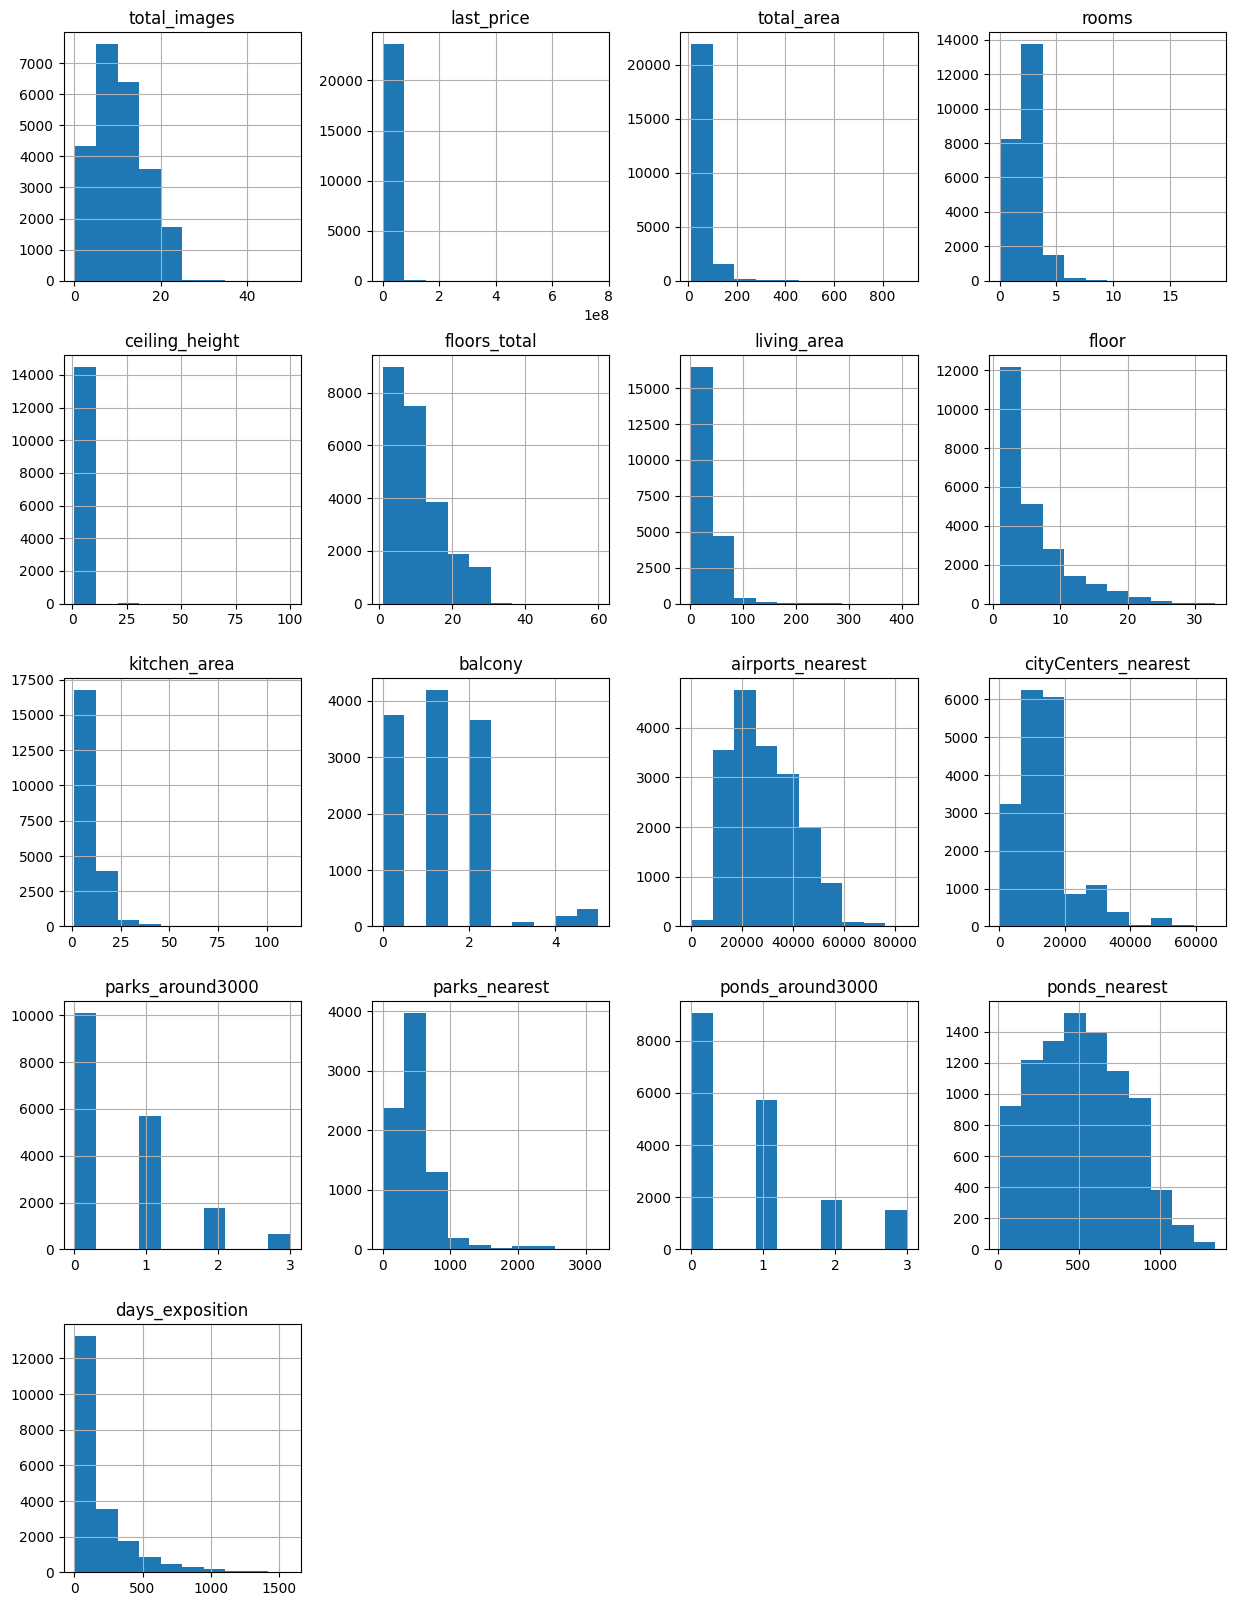

In [153]:
data.hist(figsize=(15, 20))
plt.show()

### Предобработка данных

In [154]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [155]:
data.rename(columns = {'cityCenters_nearest':'city_centers_nearest', 'parks_around3000':'parks_around_3000',\
                           'ponds_around3000':'ponds_around_3000',}, inplace = True)

### Посчитаем и добавим в таблицу новые столбцы

**Пропущенные значения**

In [156]:
 #смотрим общее кол-во строк
len(data)

23699

In [157]:
#ищем пропуски
data.isna().sum() 

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [158]:
# pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

Всего в таблице **23 699** строк, проанализируем пропуски:

**9195 ceiling_height** – большое количество пропущенных данных о высоте потолка, заменить на 0 нельзя (высота потолка не может быть = 0), но можно заменить на медианное значение;

**86 floors_total** – скорее всего данные просто не заполнили, 86 пропусков - это менее 1% от всех данных, удалим строки с пропусками для корректного расчета статистики;

**1903 living_area** – аналогично с данными о высоте потолков заменим на медианное значение;

**2775 is_apartment** – можно предположить, что пропуски являются признаком не апатртаменты, можно заменить на False;

**2278 kitchen_area** – пропуски могут быть, если квартира является студией - проверим это позже, пока оставляем Null;

**11519 balcony** – пропуски в данных о балконах говорят о том, что скорее всего нет балконов, можно заменить на 0;

**49 locality_name** – 49 пропусков - менее 1% от всех данных, удалим строки с пропусками для корректного расчета статистики;

**5542 airports_nearest** – вероятно, аэропортов рядом нет, оставляем Null;

**5519 city_centers_nearest** – пропуски могут означать, что центр города не близко, оставляем Null;

**5518 parks_around_3000** – нет парков в радиусе 3км, оставляем Null;

**15620 parks_nearest** – нет парков, оставляем Null;

**5518 ponds_around_3000** – нет прудов в радиусе 3км, оставляем Null;

**14589 ponds_nearest** – нет прудов, оставляем Null

**3181 days_exposition** – объявление не было опубликовано, заменим данные на 0.

In [159]:
#заполняем пропуски
data['is_apartment'] = data['is_apartment'].fillna('False') 
data['balcony'] = data['balcony'].fillna(0)
data['days_exposition'] = data['days_exposition'].fillna(0)

In [160]:
data = data.dropna(subset = ['locality_name'])
data = data.dropna(subset = ['floors_total']) 
data.reset_index()

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,...,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,0.0
1,1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,...,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23560,23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,...,13.83,0.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,0.0
23561,23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,...,8.50,0.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23562,23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,...,NaN,0.0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,0.0
23563,23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [161]:
#проверяем после изучения выбросов
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median()) 
data['living_area'] = data['living_area'].fillna(data['living_area'].median())
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2222
balcony                     0
locality_name               0
airports_nearest         5524
city_centers_nearest     5501
parks_around_3000        5500
parks_nearest           15535
ponds_around_3000        5500
ponds_nearest           14529
days_exposition             0
dtype: int64

In [162]:
# data.info() #еще раз посмотрим на данные

**Замена типов данных**

Необходимо сменить тип данных для:

- last_price – заменить на int; 
- first_day_exposition – заменить на date - необходимо, чтобы работать с датой в дальнейшем было удобно;
- floors_total – заменить на int;
- is_apartment – заменить на bool - необходимо, чтобы работать с булевым значением;
- balcony – заменить на int;
- days_exposition – заменить на int.

Изменение типов во всех остальных случаях необходимо, для удобства работы с данными и, чтобы сэкономить память.

In [163]:
data['last_price'] = data['last_price'].astype('int')

In [164]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'],format='%Y-%m-%dT%H:%M:%S')

In [165]:
data['floors_total'] =  data['floors_total'].astype('int')

In [166]:
data['balcony'] = data['balcony'].astype('int')

In [167]:
data['is_apartment'] =  data['is_apartment'].astype('bool')

In [168]:
data['days_exposition'].unique()

array([   0.,   81.,  558., ..., 1360., 1007.,  971.])

In [169]:
data['days_exposition'] = data['days_exposition'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  int64         
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          21343 non-null  float64       
 13  balcony              

**Проверка уникальных значений и поиск дубликатов**


**Из описания проекта:** Изучите уникальные значения в столбце с названиями и устраните неявные дубликаты. Например, «поселок Рябово» и «поселок городского типа Рябово», «поселок Тельмана» и «посёлок Тельмана» — это обозначения одних и тех же населённых пунктов. Вы можете заменить названия в существующем столбце или создать новый с названиями без дубликатов.

In [170]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

В первую очередь все названия приводим к нижнему регистру:

In [171]:
data['locality_name'] = data['locality_name'].str.lower()

Далее заменим буквы "ё" на "е":

In [172]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')

Заменим "городской поселок" на "поселок городского типа":

In [173]:
data['locality_name'] = data['locality_name'].str.replace('городской поселок', 'поселок городского типа')

Исходя из задания, цитата: "Например, «поселок Рябово» и «поселок городского типа Рябово»", можно сделать вывод о том, 
что поселок = поселок городского типа, т.о. произведем соответствующую замену:

In [174]:
data['locality_name'] = data['locality_name'].str.replace('поселок', 'поселок городского типа')

Также проверим наличие явных дубликатов:

In [175]:
data.duplicated().sum() 

0

Явные дубликаты отсутствуют.

In [176]:
#еще раз посмотрим на данные
data['locality_name'].unique() 


array(['санкт-петербург', 'поселок городского типа шушары',
       'поселок городского типа городского типа янино-1',
       'поселок городского типа парголово',
       'поселок городского типа мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок городского типа городского типа красный бор', 'гатчина',
       'деревня федоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'поселок городского типа металлострой',
       'поселок городского типа городского типа лебяжье',
       'поселок городского типа городского типа сиверский',
       'поселок городского типа молодцово',
       'поселок городского типа городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи',
       'поселок городского типа аннино',
       'поселок городского типа городского типа е

**Проверка редких и выбивающихся значений (аномалий) во всех столбцах**

**Из описания проекта:**
Найдите и устраните редкие и выбивающиеся значения. Например, в столбце ceiling_height может быть указана высота потолков 25 м и 32 м. Логично предположить, что на самом деле это вещественные значения: 2.5 м и 3.2 м. Попробуйте обработать аномалии в этом и других столбцах.
 
Если природа аномалии понятна и данные действительно искажены, то восстановите корректное значение.
В противном случае удалите редкие и выбивающиеся значения.
В ячейке с типом markdown опишите, какие особенности в данных вы обнаружили.

In [177]:
data.describe()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
count,23565.000000,2.356500e+04,23565.000000,23565,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,21343.000000,23565.000000,18041.000000,18064.000000,18065.000000,8030.000000,18065.000000,9036.000000,23565.000000
mean,9.878421,6.540058e+06,60.322824,2017-11-10 08:59:53.125398016,2.070656,2.724530,10.675875,34.102255,5.878124,10.560994,0.593677,28797.082701,14192.656056,0.611569,490.580448,0.769499,518.289509,156.420115
min,0.000000,1.219000e+04,12.000000,2014-11-27 00:00:00,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,0.000000
25%,6.000000,3.400000e+06,40.000000,2017-05-15 00:00:00,1.000000,2.600000,5.000000,19.000000,2.000000,7.000000,0.000000,18565.000000,9238.000000,0.000000,288.000000,0.000000,293.000000,22.000000
50%,9.000000,4.646000e+06,52.000000,2017-12-12 00:00:00,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26757.000000,13096.500000,0.000000,455.000000,1.000000,503.000000,73.000000
75%,14.000000,6.790000e+06,69.700000,2018-08-26 00:00:00,3.000000,2.700000,16.000000,41.100000,8.000000,12.000000,1.000000,37273.000000,16285.000000,1.000000,612.000000,1.000000,730.000000,198.000000
max,50.000000,7.630000e+08,900.000000,2019-05-03 00:00:00,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000
std,5.681156,1.091093e+07,35.657060,NaN,1.078591,0.991026,6.594823,21.189133,4.871485,5.900630,0.960660,12632.499735,8613.348153,0.802088,341.572956,0.938669,278.009558,213.517293


In [178]:
#приводим к удобному формату
data['last_price'] = data['last_price']/1000 

In [179]:
data.describe()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
count,23565.000000,23565.000000,23565.000000,23565,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,21343.000000,23565.000000,18041.000000,18064.000000,18065.000000,8030.000000,18065.000000,9036.000000,23565.000000
mean,9.878421,6540.058260,60.322824,2017-11-10 08:59:53.125398016,2.070656,2.724530,10.675875,34.102255,5.878124,10.560994,0.593677,28797.082701,14192.656056,0.611569,490.580448,0.769499,518.289509,156.420115
min,0.000000,12.190000,12.000000,2014-11-27 00:00:00,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,0.000000
25%,6.000000,3400.000000,40.000000,2017-05-15 00:00:00,1.000000,2.600000,5.000000,19.000000,2.000000,7.000000,0.000000,18565.000000,9238.000000,0.000000,288.000000,0.000000,293.000000,22.000000
50%,9.000000,4646.000000,52.000000,2017-12-12 00:00:00,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26757.000000,13096.500000,0.000000,455.000000,1.000000,503.000000,73.000000
75%,14.000000,6790.000000,69.700000,2018-08-26 00:00:00,3.000000,2.700000,16.000000,41.100000,8.000000,12.000000,1.000000,37273.000000,16285.000000,1.000000,612.000000,1.000000,730.000000,198.000000
max,50.000000,763000.000000,900.000000,2019-05-03 00:00:00,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000
std,5.681156,10910.934722,35.657060,NaN,1.078591,0.991026,6.594823,21.189133,4.871485,5.900630,0.960660,12632.499735,8613.348153,0.802088,341.572956,0.938669,278.009558,213.517293


In [180]:
#посчитаем кол-во квартир разной стоимостью
print('кол-во квартир со стоимостью 0:', data.query('last_price == 0')['last_price'].count())
print('кол-во квартир со стоимостью менеее 50 млн:', data.query('last_price < 50000')['last_price'].count())
print('кол-во квартир со стоимостью более 50 млн:', data.query('last_price > 50000')['last_price'].count())
print('кол-во квартир со стоимостью более 100 млн:', data.query('last_price > 100000')['last_price'].count())
print('кол-во квартир со стоимостью более 200 млн:', data.query('last_price > 200000')['last_price'].count())

кол-во квартир со стоимостью 0: 0
кол-во квартир со стоимостью менеее 50 млн: 23427
кол-во квартир со стоимостью более 50 млн: 131
кол-во квартир со стоимостью более 100 млн: 37
кол-во квартир со стоимостью более 200 млн: 9


Данные о квартирах стоимостью более 100 млн похожи на аномалию или вброс. С другой стороны, это может быть элитное жилье. Для расчета корректной статистики не будем учитывать эти квартиры.

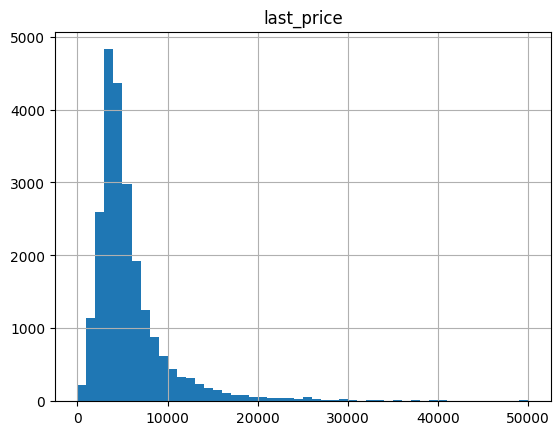

In [181]:
#построим гистрограмму без учета квартир стоимостью менее 50 млн
data.hist('last_price', bins=50, range=(0,50000)); 

Построим гистрограмму без учета квартир стоимостью менее 20 млн.

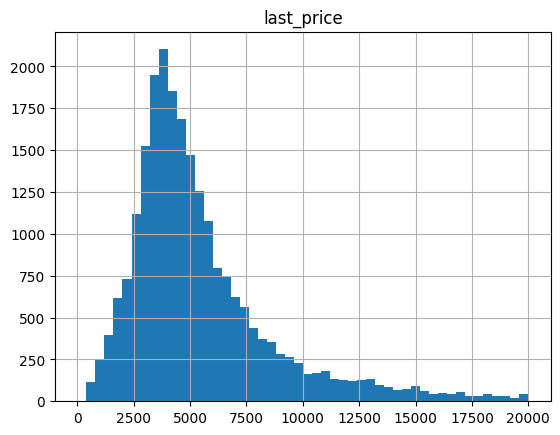

In [182]:

data.hist('last_price', bins=50, range=(0,20000)); 

In [183]:
print('кол-во квартир 0кв м:', data.query('total_area == 0')['total_area'].count())
print('кол-во квартир менее 10 кв.м.:',data.query('total_area < 10')['total_area'].count()) 
print('кол-во квартир более 10 кв.м.:',data.query('total_area > 10')['total_area'].count()) 
print('кол-во квартир 500 кв.м.:',data.query('total_area > 500')['total_area'].count())

кол-во квартир 0кв м: 0
кол-во квартир менее 10 кв.м.: 0
кол-во квартир более 10 кв.м.: 23565
кол-во квартир 500 кв.м.: 7


 Квартир площадью более 500 кв.м всего 7 - это может быть выброс или элитное жилье, поскольку значений немного, можно удалить их.

In [184]:
data.drop(index=data.query('total_area > 500').index,inplace=True); 

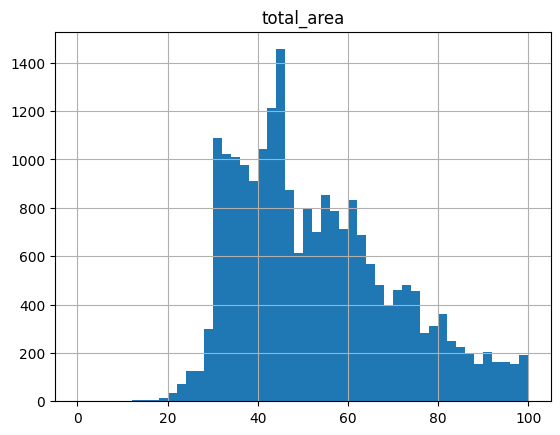

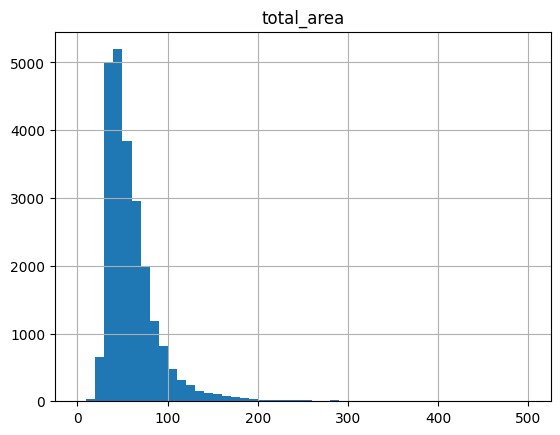

In [185]:
data.hist('total_area', bins=50, range=(0,100)); 
data.hist('total_area', bins=50, range=(0,500)); 

In [186]:
print('кол-во квартир без комнат:',data.query('rooms == 0')['rooms'].count())
print('кол-во квартир без комнат и студии:',data.query('rooms == 0 and studio')['rooms'].count()) 
print('кол-во квартир без комнат и апартаменты:',data.query('rooms == 0 and is_apartment')['rooms'].count()) 
print('кол-во квартир без комнат и свободная планировка:',data.query('rooms == 0 and open_plan')['rooms'].count())

кол-во квартир без комнат: 194
кол-во квартир без комнат и студии: 135
кол-во квартир без комнат и апартаменты: 188
кол-во квартир без комнат и свободная планировка: 59


In [187]:
print('кол-во квартир до 3х комнат:', data.query('rooms <= 3')['rooms'].count())
print('кол-во квартир до 7ми комнат:', data.query('rooms < 7')['rooms'].count())
print('кол-во квартир более 7ми комнат:', data.query('rooms > 7')['rooms'].count())

кол-во квартир до 3х комнат: 21874
кол-во квартир до 7ми комнат: 23474
кол-во квартир более 7ми комнат: 29


В данных есть 194 квартиры без комнат - это студии, апартаменты и квартиры со свободной планировкой. Не будем удалять их. 
Также в данных есть 29 квартир с 7-ю или большим количеством контат - такие квартиры точно отразятся на статистике, поэтому лучше исключить их. 

In [188]:
data.drop(index=data.query('rooms > 7').index,inplace=True)

**Из описания проекта:** Найдите и устраните редкие и выбивающиеся значения. Например, в столбце ceiling_height может быть указана высота потолков 25 м и 32 м. Логично предположить, что на самом деле это вещественные значения: 2.5 м и 3.2 м. Попробуйте обработать аномалии в этом и других столбцах.

In [189]:
print('кол-во квартир с потолками 0м:', data.query('ceiling_height == 0')['ceiling_height'].count())
print('кол-во квартир с потолками до 2.5м:', data.query('ceiling_height < 2.5')['ceiling_height'].count())
print('кол-во квартир с потолками от 2.5 до 4м:', data.query('ceiling_height > 2.5 and ceiling_height <= 4')['ceiling_height'].count())
print('кол-во квартир с потолками от 4 до 11м:', data.query('ceiling_height > 4 and ceiling_height <= 11')['ceiling_height'].count())
print('кол-во квартир с потолками более 11м:', data.query('ceiling_height > 11')['ceiling_height'].count())
print('кол-во квартир с потолками более 50м:', data.query('ceiling_height > 50')['ceiling_height'].count())
                                                          

кол-во квартир с потолками 0м: 0
кол-во квартир с потолками до 2.5м: 73
кол-во квартир с потолками от 2.5 до 4м: 19868
кол-во квартир с потолками от 4 до 11м: 50
кол-во квартир с потолками более 11м: 24
кол-во квартир с потолками более 50м: 1


Большинство квартир – с высотой потолков от 2.5 до 4м, что кажется логичным, учитывая, что стандартная высота потолков в квартирах от 2.5 до 3.2м. Также есть 50 квартир с потолками от 4м до 11м – возможно, это пентхаусы или двухярусные квартиры. 

А вот квартиры с потолками менее 2.5м и более 11м вызывают вопросы, кроме этого есть одна квартира с потолками 50м - скорее всего это выброс, удалим их.

In [190]:
data.drop(index=data.query('ceiling_height < 2.5').index,inplace=True)
data.drop(index=data.query('ceiling_height > 11').index,inplace=True)

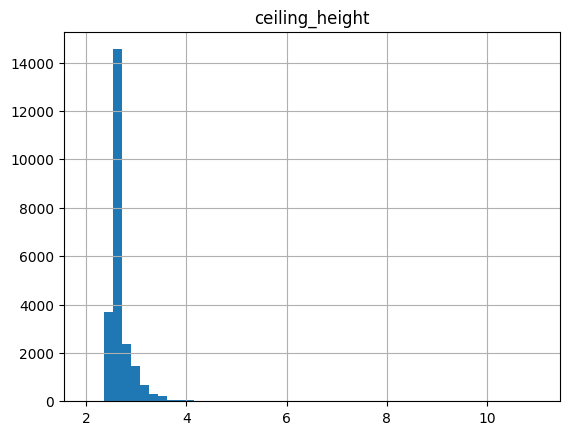

In [191]:
data.hist('ceiling_height', bins=50, range=(2,11)); 

In [192]:
print('кол-во квартир в одноэтажных домах:', data.query('floors_total == 1')['floors_total'].count())
print('кол-во квартир в домах высотой от 2 до 30 этажей:', data.query('floors_total > 2 and floors_total < 30')['floors_total'].count())
print('кол-во квартир в домах высотой более 30 этажей:', data.query('floors_total > 30')['floors_total'].count())

кол-во квартир в одноэтажных домах: 23
кол-во квартир в домах высотой от 2 до 30 этажей: 23006
кол-во квартир в домах высотой более 30 этажей: 30


Большиство квартир расположено в домах высотой менее 30 этажей, отсюда можно предоположить, что дома выше 30 этажей - это аномальные значения и от них следует избавиться.

In [193]:
data.drop(index=data.query('floors_total > 30').index,inplace=True)

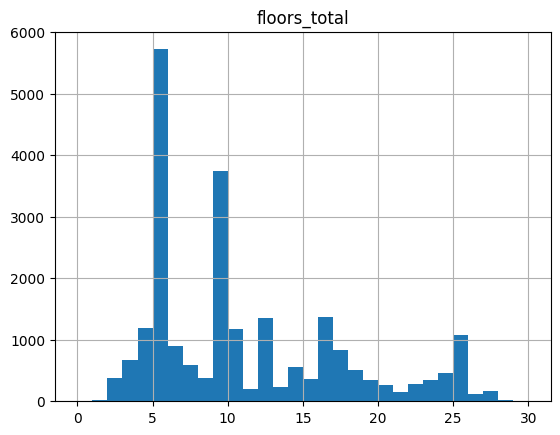

In [194]:
data.hist('floors_total', bins=30, range=(0,30)); 

In [195]:
print('кол-во квартир с площадью < 10 кв.м.: ',data.query('living_area < 10')['living_area'].count())
print('кол-во квартир с площадью от 10 до 60 кв.м: ',data.query('living_area > 10 and living_area < 60')['living_area'].count())
print('кол-во квартир с площадью от 60 до 200 кв.м : ',data.query('living_area > 60 and living_area < 200')['living_area'].count())
print('кол-во квартир с площадью от 200 кв.м: ',data.query('living_area > 200')['living_area'].count())


кол-во квартир с площадью < 10 кв.м.:  25
кол-во квартир с площадью от 10 до 60 кв.м:  21701
кол-во квартир с площадью от 60 до 200 кв.м :  1552
кол-во квартир с площадью от 200 кв.м:  19


Также проверим квартиры площадь, которых привышает общую жилую площадь.

In [196]:

data.query('living_area > total_area')['living_area'].count()

70

Большинство квартир имеют площадь от 10 до 60 кв.м. Квартиры с площадью менее 10 кв.м. и более 200 кв.м. вызывают подозрения - скорее всего эти данные некорректны, удалим их.

In [197]:
data.drop(index=data.query('living_area < 10').index,inplace=True)
data.drop(index=data.query('living_area > 200').index,inplace=True)

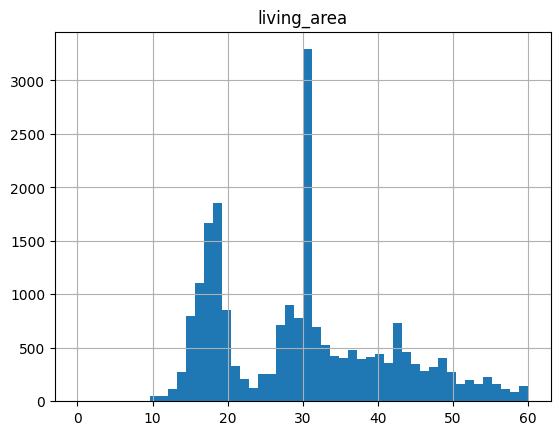

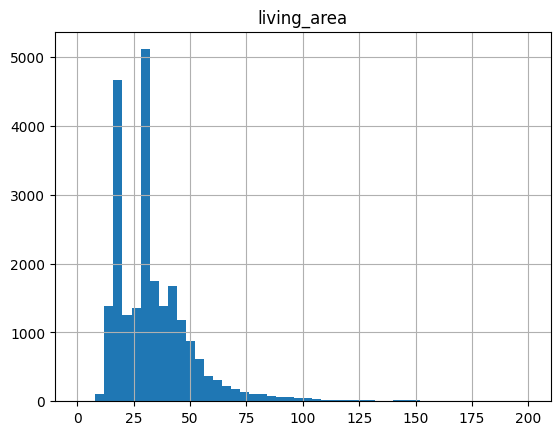

In [198]:
data.hist('living_area', bins=50, range=(0,60)); 
data.hist('living_area', bins=50, range=(0,200)); 

In [199]:
print('кол-во этажей в доме = 0:', data.query('floor == 0')['floor'].count())
print('кол-во этажей в доме > 30:', data.query('floor > 30')['floor'].count())
data['floor'].unique()

кол-во этажей в доме = 0: 0
кол-во этажей в доме > 30: 0


array([ 8,  1,  4,  9, 13,  5,  6, 22, 26,  7,  3,  2, 11, 15, 18, 10, 19,
       16, 20, 27, 25, 17, 14, 12, 21, 24, 23])

Данные кажутся логичными.

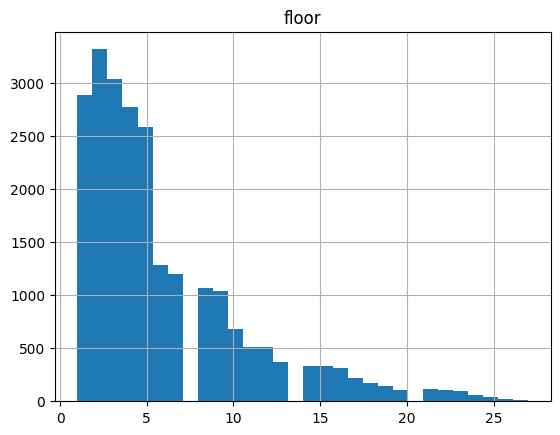

In [200]:
data.hist('floor', bins=30); 

In [201]:
print('площадь кухни меньше 2 кв.м.:', data.query('kitchen_area < 2')['living_area'].count())
print('площадь кухни 5 кв.м.:', data.query('kitchen_area == 5')['living_area'].count())
print('площадь кухни больше 40 кв.м.:', data.query('kitchen_area > 40')['living_area'].count())

площадь кухни меньше 2 кв.м.: 1
площадь кухни 5 кв.м.: 355
площадь кухни больше 40 кв.м.: 114


При анализе площадей кухонь подозрительными кажутся кухни площадью менее 1 кв.м. и более 38 кв.м. - квартир с такими кухнями 1 и 114 соответственно. Удалим их.

In [202]:
data.drop(index=data.query('kitchen_area < 2').index, inplace=True)
data.drop(index=data.query('kitchen_area > 40').index, inplace=True)

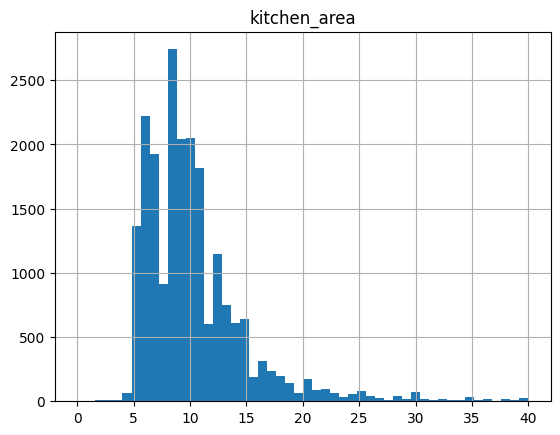

In [203]:
data.hist('kitchen_area', bins=50, range=(0,40)); 

С учетом замены пустых значений в в столбце с данными о кличестве балконов, кажется, что информация отражается корректно - дополниетльные правки не требуются.

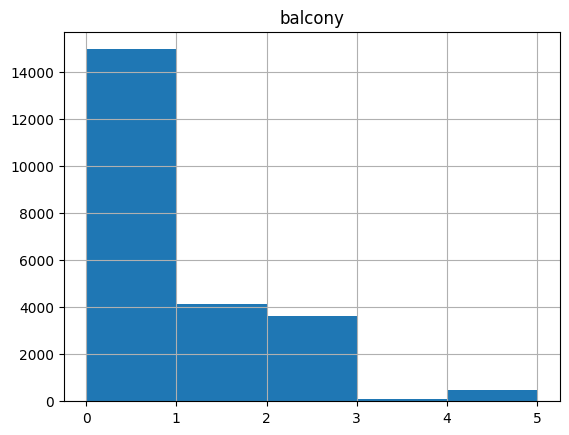

In [204]:
data.hist('balcony', bins=5); 

In [205]:
data.describe()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
count,23243.000000,23243.000000,23243.000000,23243,23243.000000,23243.000000,23243.000000,23243.000000,23243.000000,21043.000000,23243.000000,17767.000000,17788.000000,17789.000000,7876.000000,17789.000000,8866.000000,23243.000000
mean,9.861421,6231.946949,59.206988,2017-11-10 18:44:42.923891200,2.051758,2.696544,10.671901,33.564510,5.868606,10.281625,0.592307,28817.265942,14233.740331,0.607454,490.866811,0.761988,521.032822,156.115002
min,0.000000,430.000000,12.000000,2014-11-27 00:00:00,0.000000,2.500000,1.000000,10.000000,1.000000,2.000000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,0.000000
25%,6.000000,3400.000000,40.000000,2017-05-16 00:00:00,1.000000,2.600000,5.000000,19.000000,2.000000,7.000000,0.000000,18503.000000,9329.000000,0.000000,288.000000,0.000000,298.000000,22.000000
50%,9.000000,4600.000000,52.000000,2017-12-13 00:00:00,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,26773.000000,13118.500000,0.000000,455.000000,0.000000,505.000000,73.000000
75%,14.000000,6700.000000,69.000000,2018-08-27 00:00:00,3.000000,2.700000,16.000000,41.000000,8.000000,12.000000,1.000000,37347.500000,16293.000000,1.000000,612.000000,1.000000,733.000000,197.500000
max,50.000000,330000.000000,500.000000,2019-05-03 00:00:00,7.000000,10.300000,29.000000,200.000000,27.000000,40.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000
std,5.670258,7754.541771,31.008209,NaN,1.024246,0.232300,6.534190,18.671568,4.847173,4.763392,0.958091,12666.079825,8611.342089,0.799069,340.919379,0.931673,277.109180,212.949657


Посмотрим на гистограммы, построенные по оставшимся столбцам.

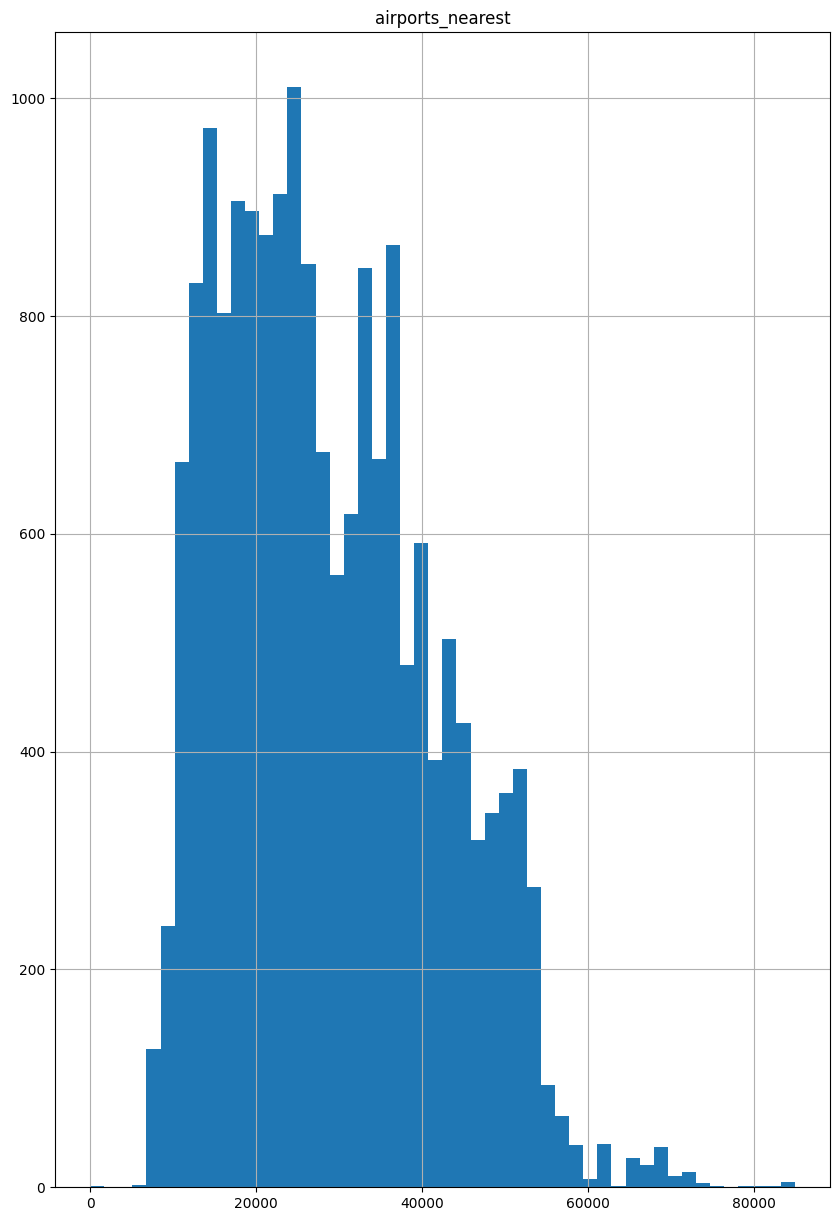

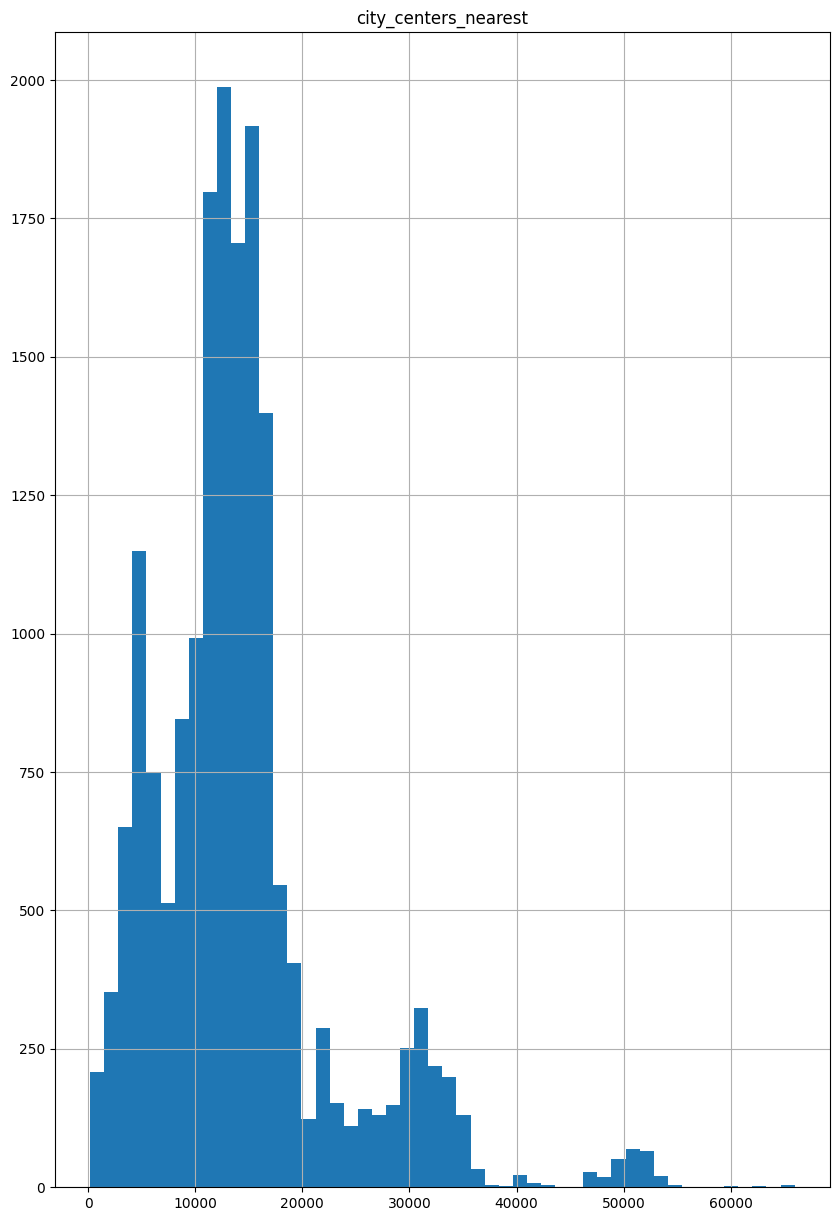

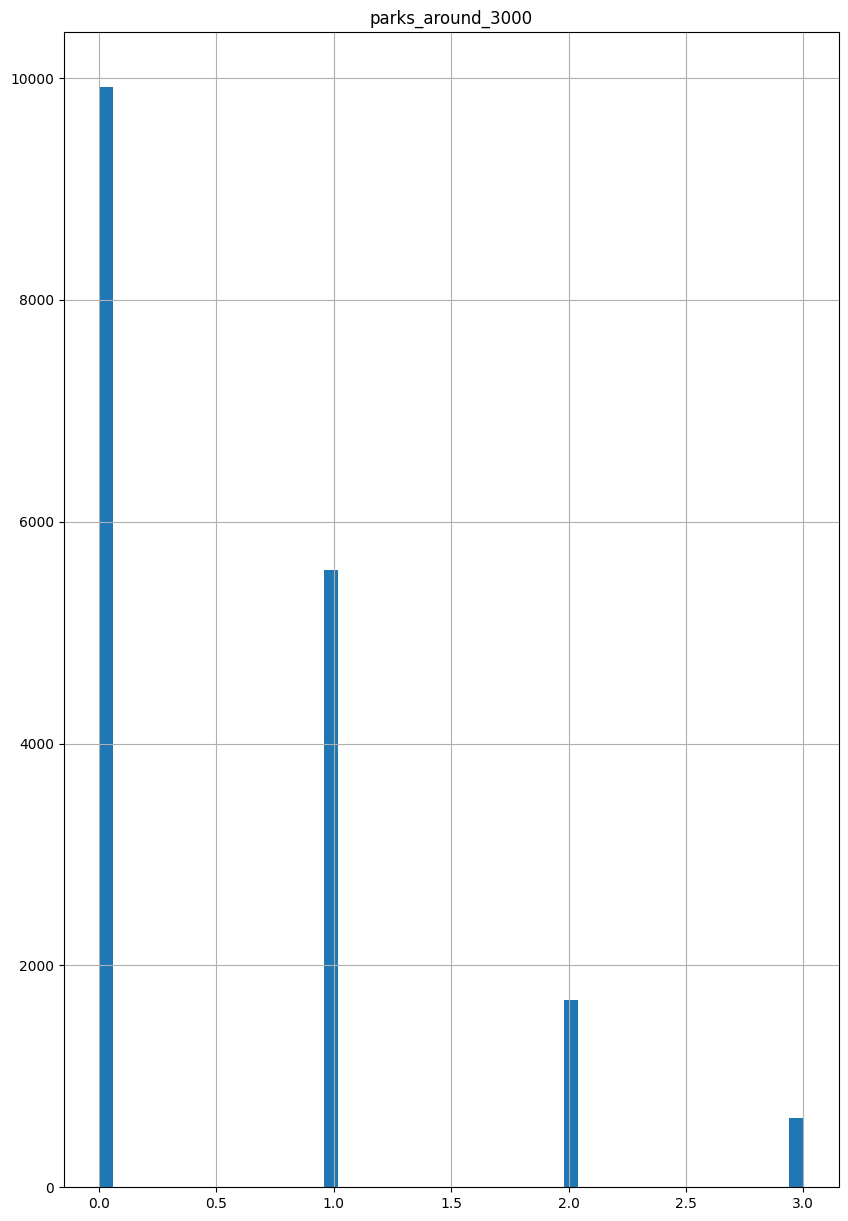

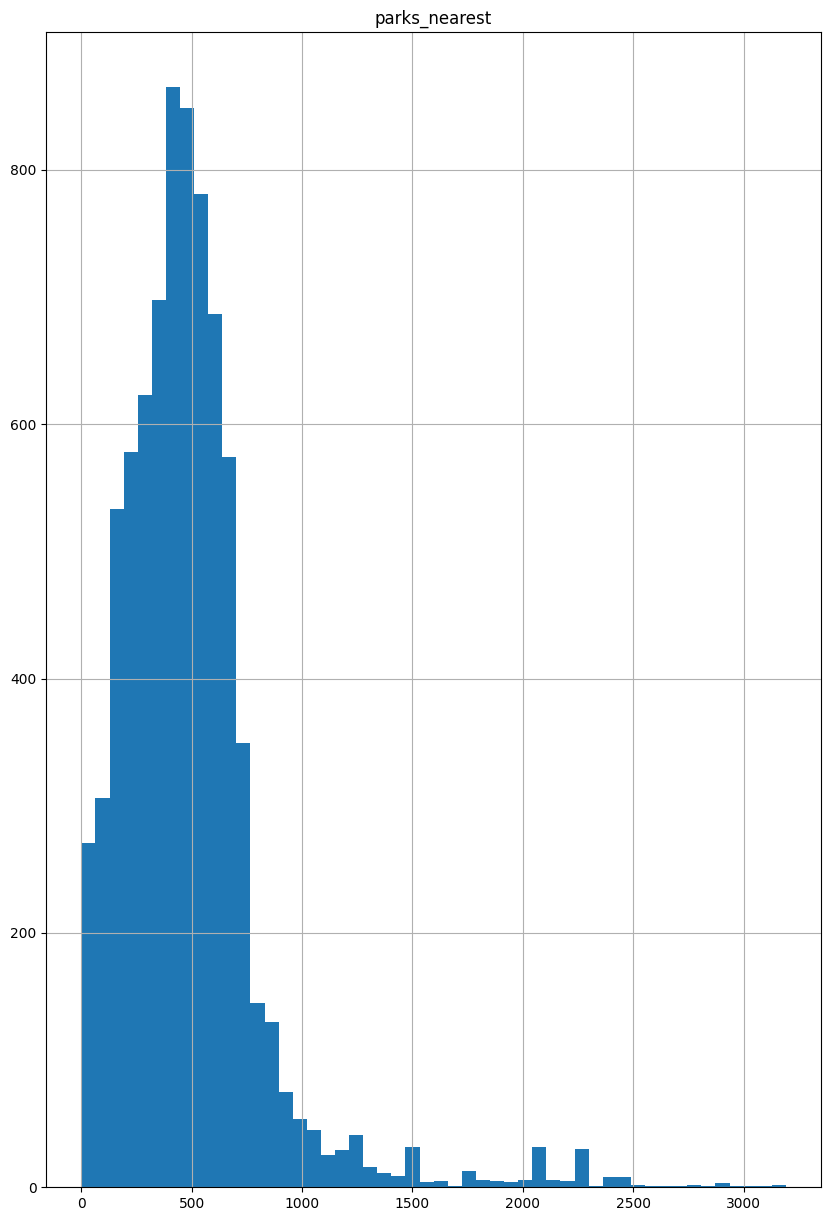

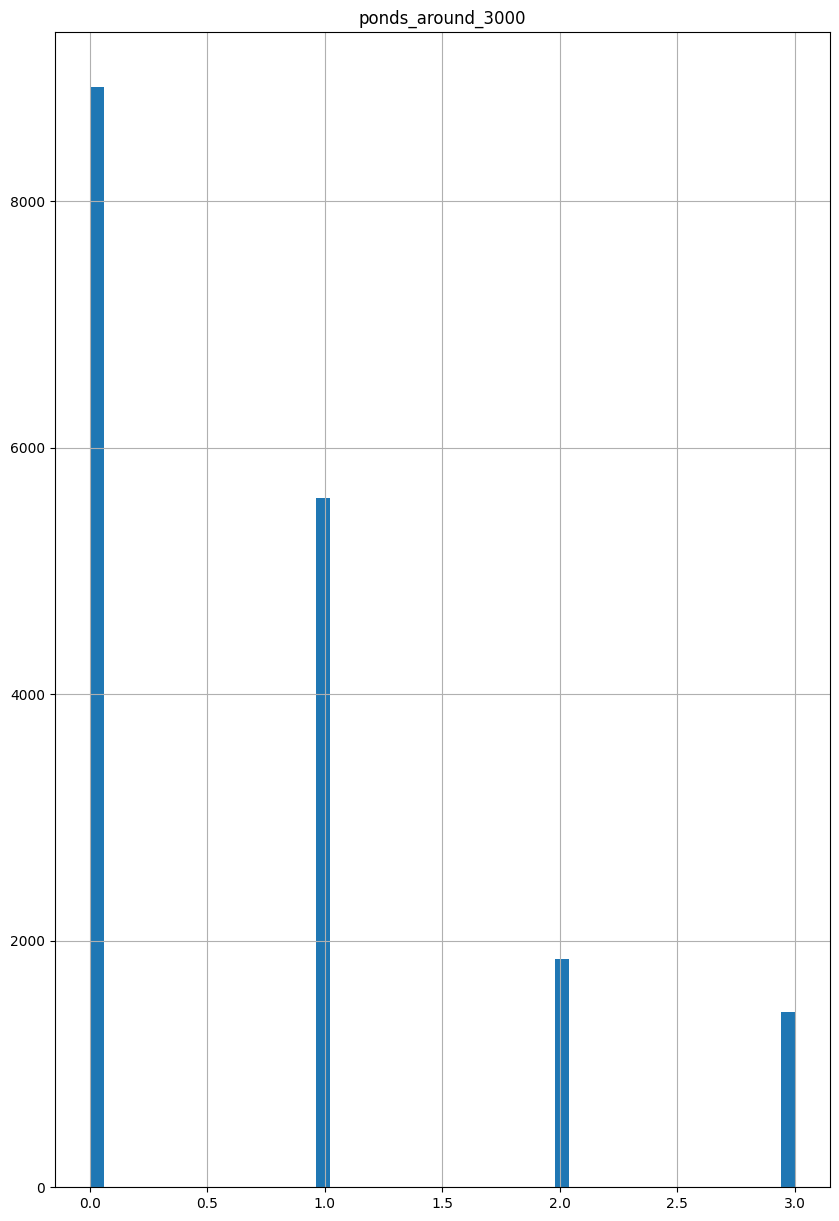

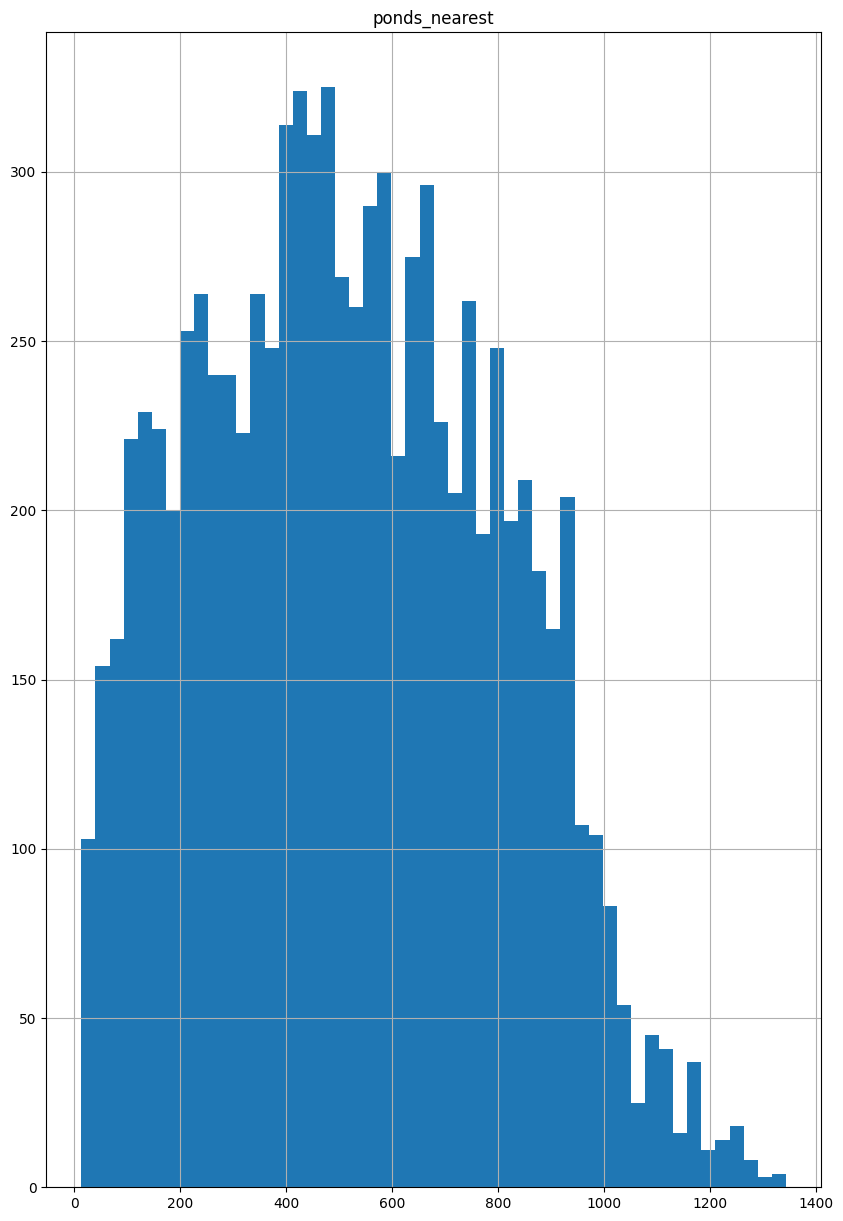

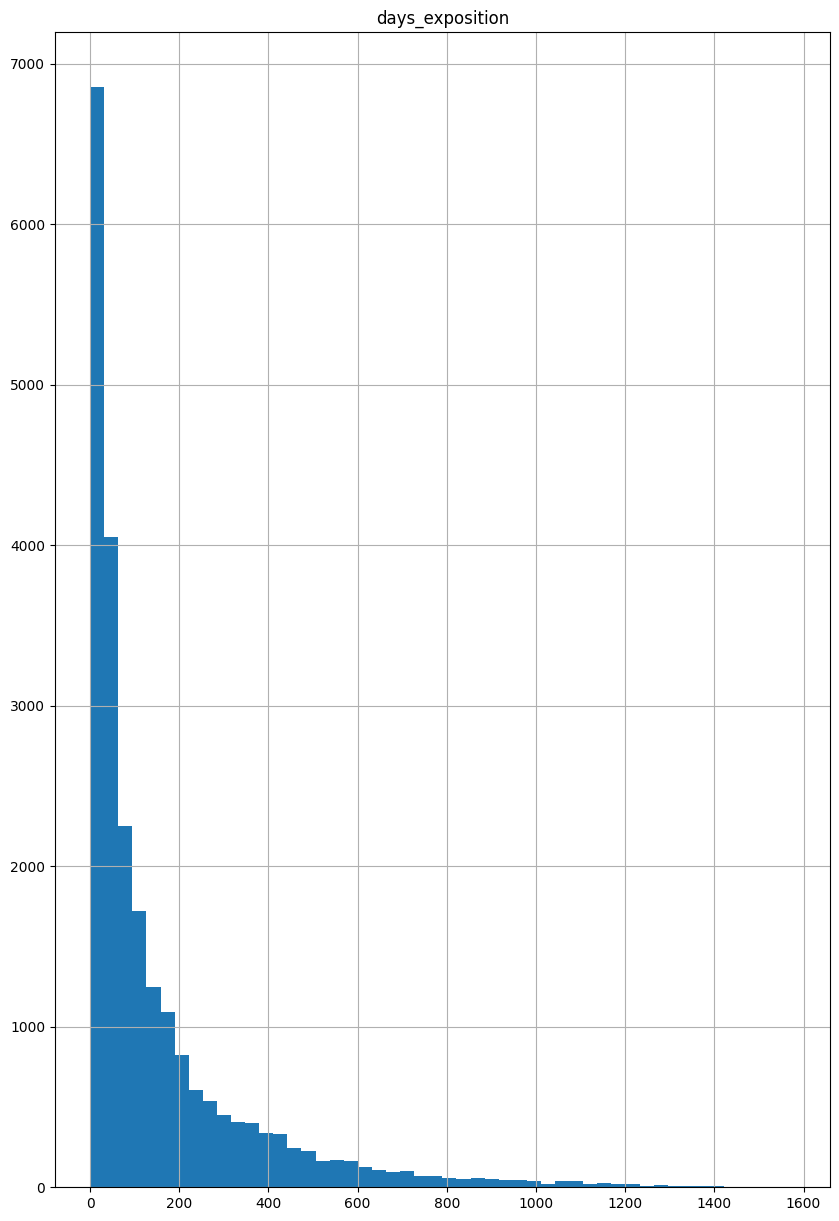

In [206]:

#укрупним, чтобы рассмотреть аномальные значения
data.hist('airports_nearest', bins=50, figsize=(10,15)); 
data.hist('city_centers_nearest', bins=50, figsize=(10,15)); 
data.hist('parks_around_3000', bins=50, figsize=(10,15)); 
data.hist('parks_nearest', bins=50, figsize=(10,15)); 
data.hist('ponds_around_3000', bins=50, figsize=(10,15)); 
data.hist('ponds_nearest', bins=50, figsize=(10,15)); 
data.hist('days_exposition', bins=50, figsize=(10,15)); 


**city_centers_nearest, arks_around_3000, parks_nearest, ponds_around_3000, ponds_nearest** – графики не вызывают вопросов;

**airports_nearest, days_exposition** – наблюдаются аномалии, на которые следует посмотреть более внимательно.

In [207]:
print('аэропорт очень близко:', data.query('airports_nearest < 1')['airports_nearest'].count())

аэропорт очень близко: 1


Кажется, что близость к аэропорту меньше, чем 1км является аномальным значением – удалим эту строку.

In [208]:
data.drop(index=data.query('airports_nearest < 1').index, inplace=True)

In [209]:
print('объявление не было размещено:', data.query('days_exposition == 0')['days_exposition'].count())
print('объявление было размещено более года:', data.query('days_exposition > 365')['days_exposition'].count())
print('объявление было размещено более 3х лет:', data.query('days_exposition > 1095')['days_exposition'].count())

объявление не было размещено: 3099
объявление было размещено более года: 2975
объявление было размещено более 3х лет: 160


Объявления, которые не были размещены могут содержать информацию, которую будет полезно учесть в статистике. 
Удалим объявления, которые были размещены более 3х лет. 

In [210]:
data.drop(index=data.query('days_exposition > 1095').index, inplace=True)

In [211]:
#сбросим индексацию после произведенных удалений
data.reset_index(drop=True,inplace=True) 

<div class="alert alert-block alert-info">
    
**Вывод по разделу:**
    
    
по итогам анализа данных были выявлены аномальные значения и выбросы, чтобы рассчитать более точную статистику были предприняты следующие действия:
- **locality_name** – названия объявлений приведены к единому регистру, буквы «ё» изменены на «е», произведена замена «городской поселок» на «поселок городского типа».
- **last_price** – исключены данные с очень дорогими квартирами (более 100 млн руб
- **total_area**  – исключены данные о кратерах с очень большой площадью  – более 500 кв м 
- **rooms** – исключены данные о квартирах с количеством комнат от 7 и выше
- **ceiling_height** – удалены данные с потолками менее 2.5м и более 11м
- **floors_total** – исключены данные с очень высокими этажам (выше 30-го)
- **total_area** – удалены квартиры с площадью менее 10 кв.м. и более 200 кв.м
- **kitchen_area** – удалены квартиры с площадью кухни менее 1 кв.м. и более 38 кв.м
- **airports_nearest** – удалена квартира с близостью к аэропорту меньше, чем 1км 
- **days_exposition** – удалены объявления со сроком размещения более 3х лет
    
 </div>

**Добавление новых данных в таблицу** 

In [212]:
#посчитано и добавлено в таблицу: цена одного квадратного метра
data['m_price'] = data['last_price'] / data['total_area']

In [213]:
#посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
data['week_day'] = data['first_day_exposition'].dt.dayofweek

#в новом столбце week_day отображается день недели, где:
#0 - понедельник
#1 - вторник
#2 - среда
#3 - четверг
#4 - пятница
#5 - суббота
#6 - воскресенье

In [214]:
#посчитано и добавлено в таблицу: месяц публикации объявления
data['month'] = data['first_day_exposition'].dt.month

In [215]:
#посчитано и добавлено в таблицу: год публикации объявления
data['year'] = data['first_day_exposition'].dt.year

In [216]:
# посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
def floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

data['floor_type'] = data.apply(floor_type, axis=1)

In [217]:
#посчитано и добавлено в таблицу: расстояние в км до центра города
#data['city_centers_nearest_km'] = data['city_centers_nearest']/1000

data['city_centers_nearest_km'] = round(data['city_centers_nearest'] / 1000) #добавлено окргуление км

In [218]:
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23082 entries, 0 to 23081
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   total_images             23082 non-null  int64         
 1   last_price               23082 non-null  float64       
 2   total_area               23082 non-null  float64       
 3   first_day_exposition     23082 non-null  datetime64[ns]
 4   rooms                    23082 non-null  int64         
 5   ceiling_height           23082 non-null  float64       
 6   floors_total             23082 non-null  int64         
 7   living_area              23082 non-null  float64       
 8   floor                    23082 non-null  int64         
 9   is_apartment             23082 non-null  bool          
 10  studio                   23082 non-null  bool          
 11  open_plan                23082 non-null  bool          
 12  kitchen_area             20890 n

### Проведите исследовательский анализ данных

Изучены и описаны следующие параметры:
  - общая площадь;
  - жилая площадь;
  - площадь кухни;
  - цена объекта;
  - количество комнат;
  - высота потолков;
  - этаж квартиры;
  - тип этажа квартиры («первый», «последний», «другой»);
  - общее количество этажей в доме;
  - расстояние до центра города в метрах;
  - расстояние до ближайшего аэропорта;
  - расстояние до ближайшего парка;
  - день и месяц публикации объявления

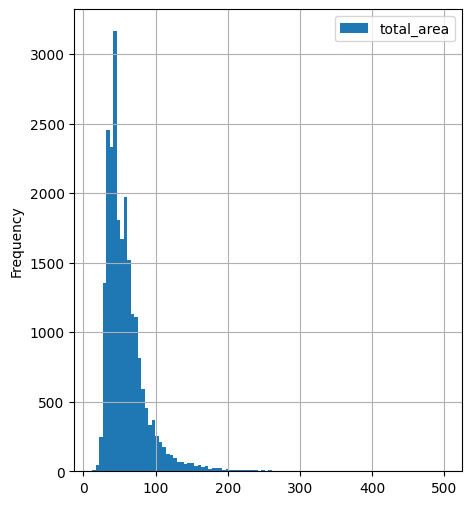

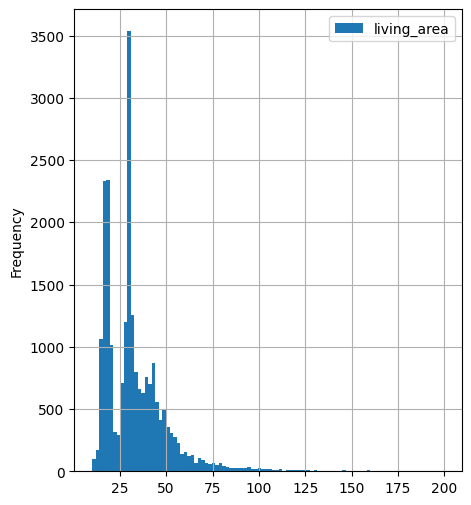

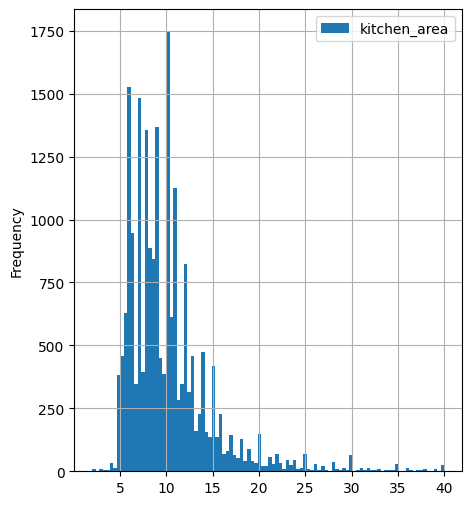

In [219]:
data.plot(kind='hist', y='total_area',  bins=100, figsize=(5,6), grid=True, legend=True); 
data.plot(kind='hist', y='living_area',  bins=100, figsize=(5,6), grid=True, legend=True); 
data.plot(kind='hist', y='kitchen_area',  bins=100, figsize=(5,6), grid=True, legend=True); 

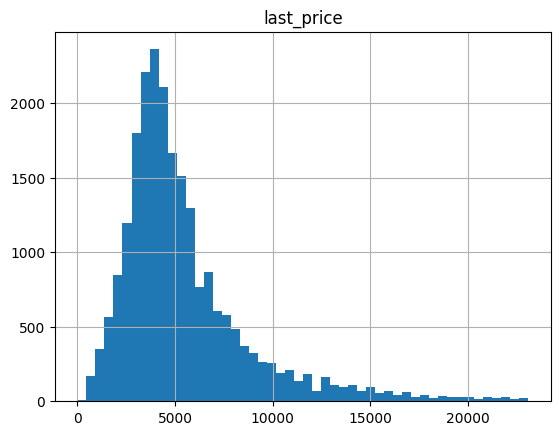

In [220]:
data.hist('last_price', bins=50, range=(0,23081)); 

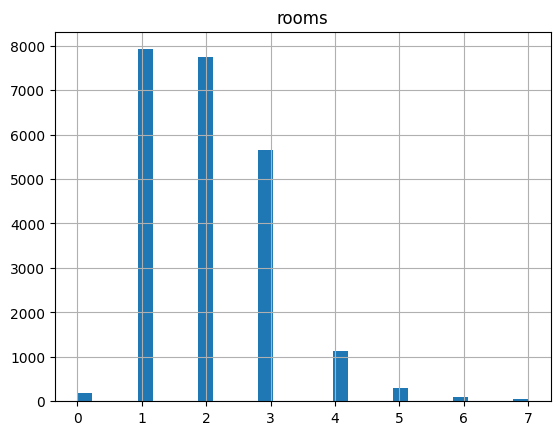

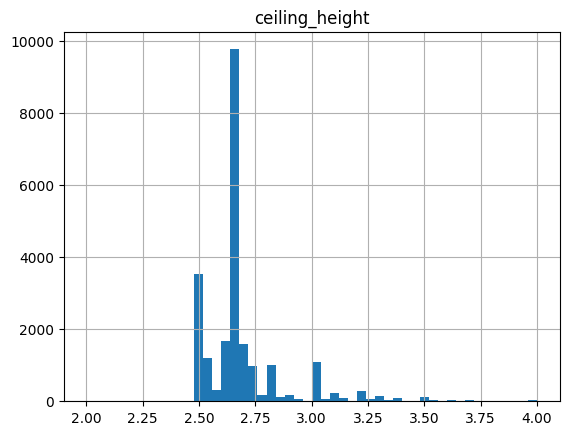

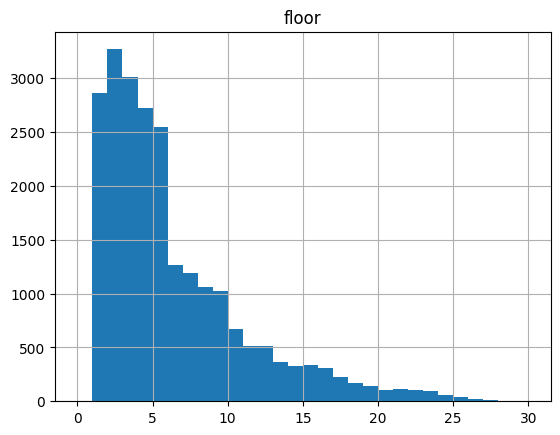

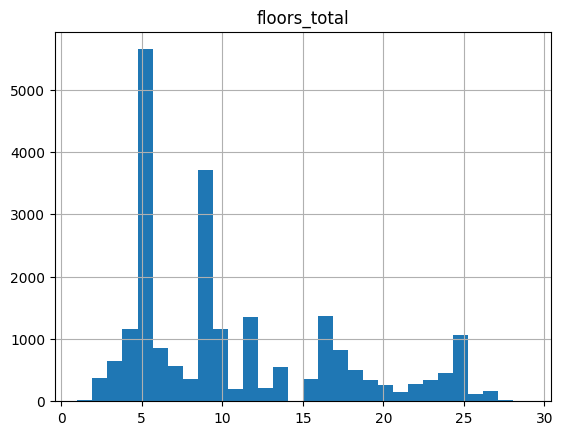

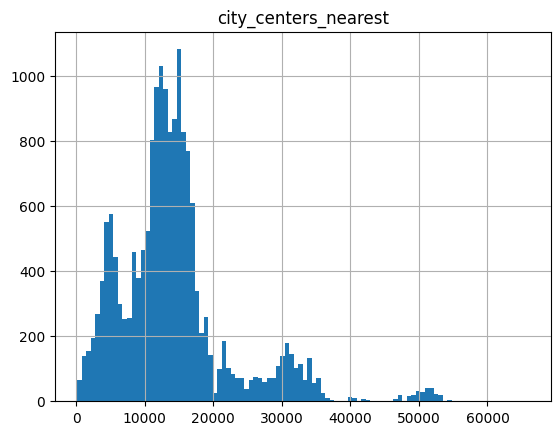

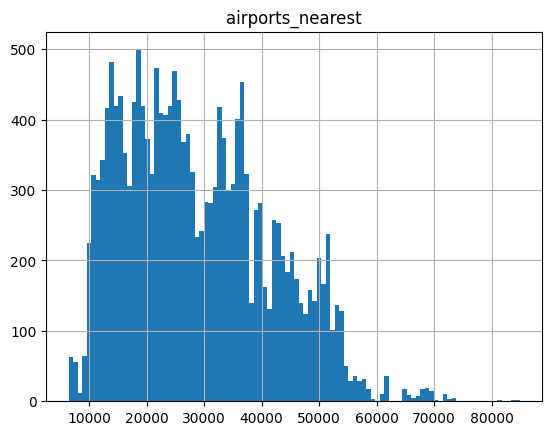

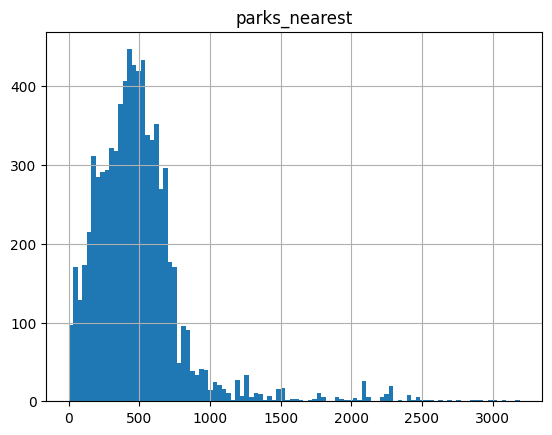

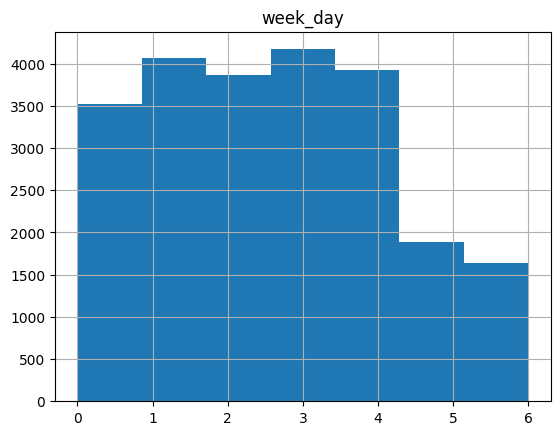

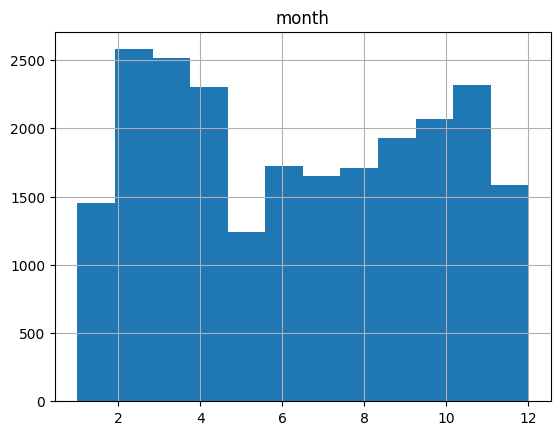

In [221]:
data.hist('rooms', bins=30); 
data.hist('ceiling_height', bins=50, range=(2,4)); 
data.hist('floor', bins=30, range=(0,30)); 
data.hist('floors_total', bins=30); 
data.hist('city_centers_nearest', bins=100); 
data.hist('airports_nearest', bins=100); 
data.hist('parks_nearest', bins=100); 
data.hist('week_day', bins=7); 
data.hist('month', bins=12); 


**Выводы:**
- больше всего квартир с 1-ой и 2-мя комнатами
- в основном высота потолков варьируется от 2.5 до 3м. Набольший пик наблюдается для квартир с потолками 2.7м
- больше всего квартир от 1 до 6 этажей – скорее всего, это связно с тем, что в выборке не только квартиры из Санкт-Петербурга, но и другиз населнных пунктов, где общая высотность домов ниже
- больше всего 5-ти этажных домов – опять же, возможно, связано с небольшими населенными пунктами. Также наблюдается пробел в 14-ти этажных домах.
- удаленность от центра варьируется: наблюдаются пики на удаленности = 5км, и между 10 и 20км
- удаленность от аэропорта "разбросана" на графике, что кажется вполне логичным 
- близость к паркам: наблюдаются пики в районе 400-750м - квартир с такой удаленностью от парков больше всего
- чаще всего объявления выкладывали в середине недели (по средам), а меньше всего в выходные (субб, воскр)
- меньше всего объявления выкладывали в мае, а чаще всего - в феврале и марте

In [222]:
floor_type_count = data.groupby('floor_type')['floor_type'].count()

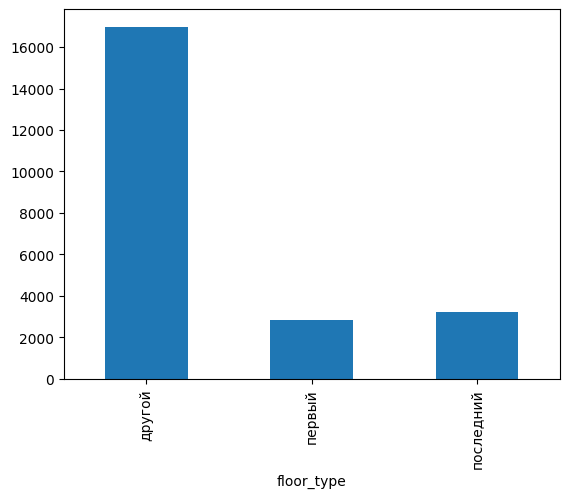

In [223]:
floor_type_count.plot(kind='bar'); 

Больше всего типов этажей – "другой", что вполне логично. 

Изучим, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.

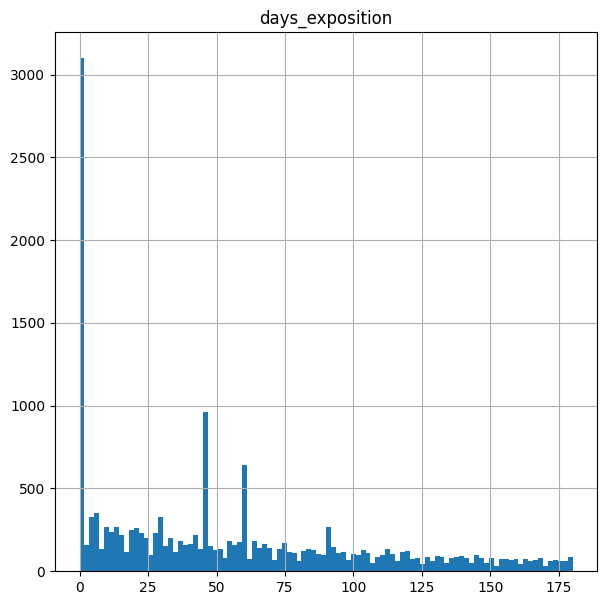

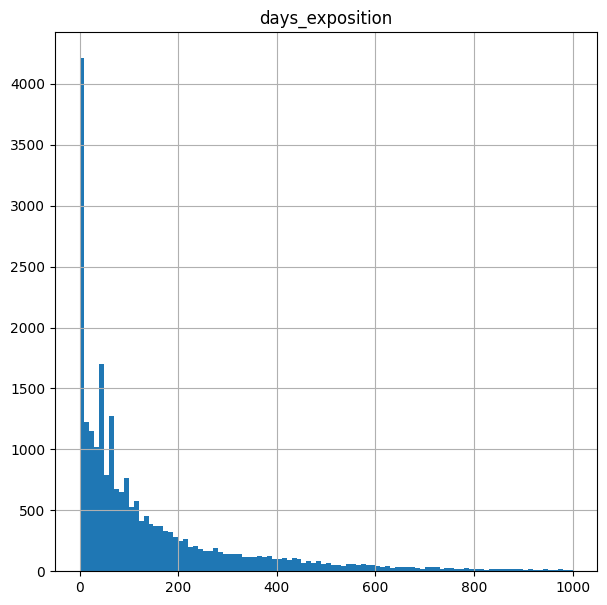

In [224]:
data.hist('days_exposition', bins=100, range = (0,180), figsize=(7,7)); 
data.hist('days_exposition', bins=100, range = (0,1000), figsize=(7,7)); 

In [225]:
data['days_exposition'].describe()

count    23082.000000
mean       148.560913
std        193.057262
min          0.000000
25%         22.000000
50%         72.000000
75%        193.000000
max       1095.000000
Name: days_exposition, dtype: float64

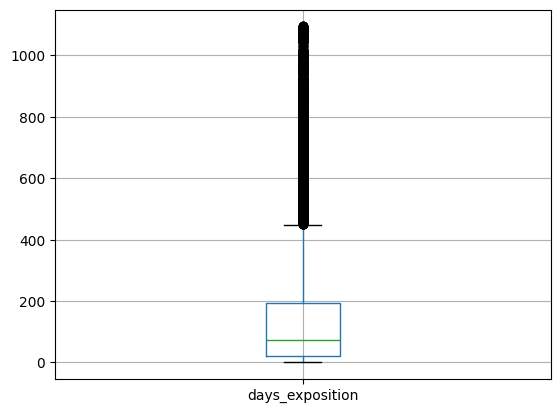

In [226]:
data.boxplot(column='days_exposition'); 

Среднее время продажи квартиры составляет 156 дней (около 5 месяцев). Но если посмотреть на медиану – то это уже 73 дня (В 2-а раза мньше). Это связано с тем, что в данных есть "хвост" квартир, которые продавались долго – от года до трех лет.

Ответим на вопрос: Какие факторы больше всего влияют на общую (полную) стоимость объекта?

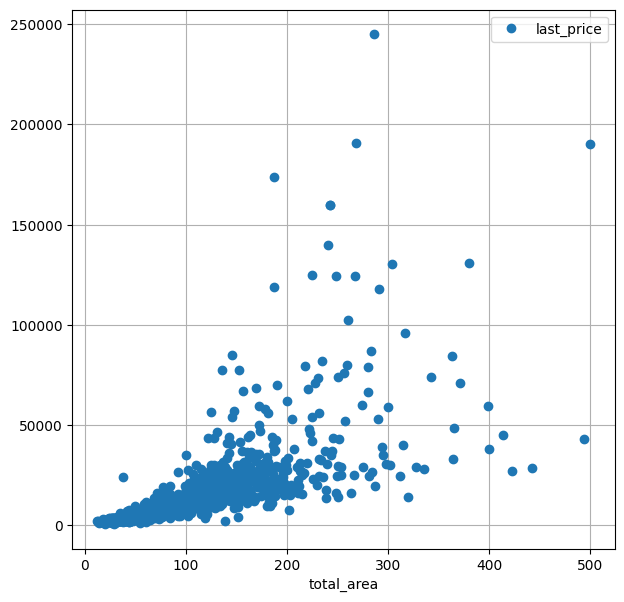

In [227]:
#зависимость цены квартиры от общей площади
(
    data.pivot_table(index='total_area', values='last_price')
    .plot(grid=True, style='o', figsize=(7, 7))
); 

In [228]:
data[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms', 'floor']].corr()

,last_price,total_area,living_area,kitchen_area,rooms,floor
last_price,1.000000,0.684014,0.545393,0.478537,0.387811,0.031018
total_area,0.684014,1.000000,0.856818,0.581419,0.765929,-0.026953
living_area,0.545393,0.856818,1.000000,0.378503,0.824345,-0.102916
kitchen_area,0.478537,0.581419,0.378503,1.000000,0.235104,0.169423
rooms,0.387811,0.765929,0.824345,0.235104,1.000000,-0.157399
floor,0.031018,-0.026953,-0.102916,0.169423,-0.157399,1.000000


<div class="alert alert-block alert-info">
Корреляция цены и других факторов – положительная.
Наибольшая коррекляция наблюдается у цены и общей площади – чем больше площадь, тем выше стоимость квартиры.

</div>

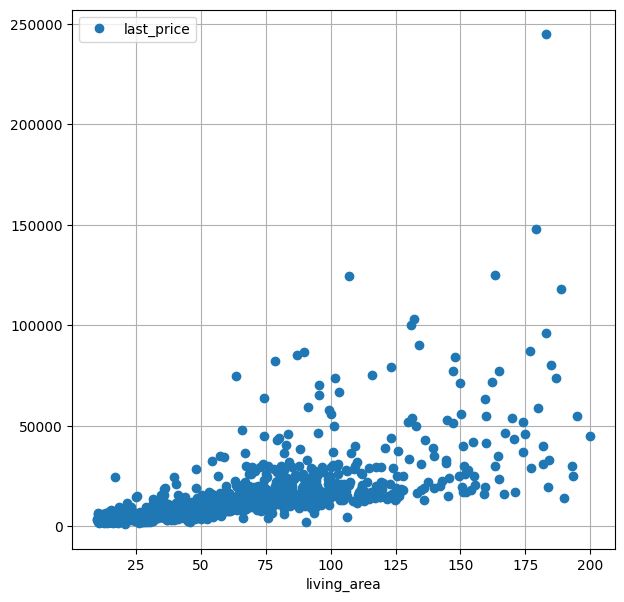

In [229]:
#зависимость цены квартиры от жилой площади
(
    data.pivot_table(index='living_area', values='last_price')
    .plot(grid=True, style='o', figsize=(7, 7))
); 

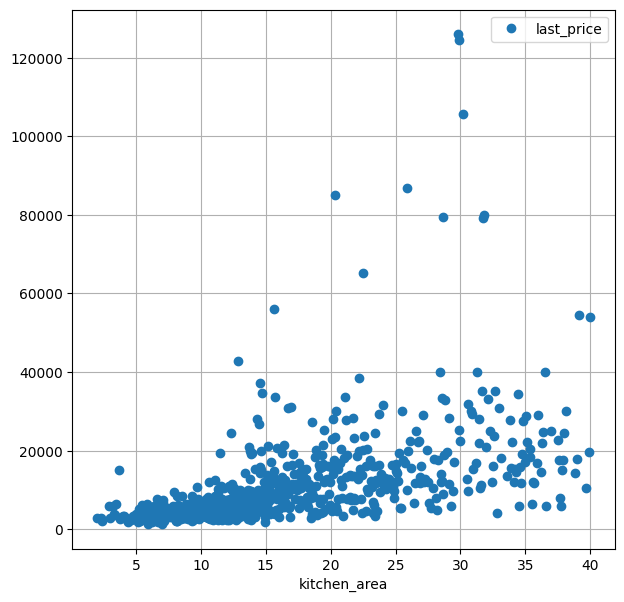

In [230]:
#зависимость цены квартиры от площади кухни
(
    data.pivot_table(index='kitchen_area', values='last_price')
    .plot(grid=True, style='o', figsize=(7, 7))
); 

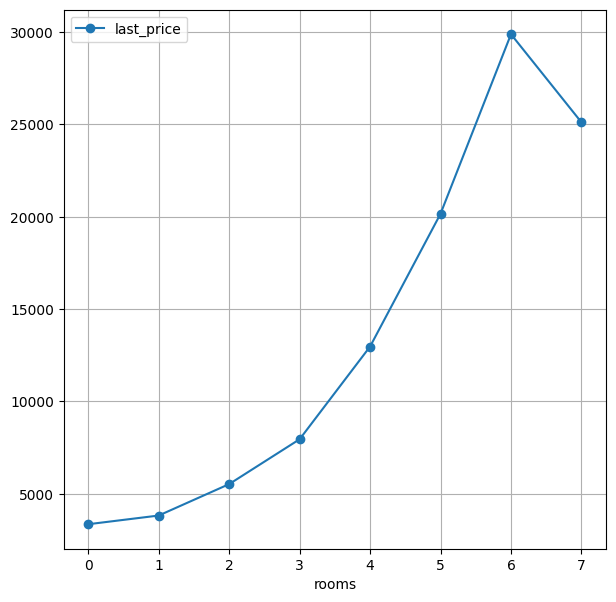

In [231]:
#зависимость цены квартиры от количество комнат
(
    data.pivot_table(index='rooms', values='last_price')
    .plot(grid=True, style='o-', figsize=(7, 7))
); 

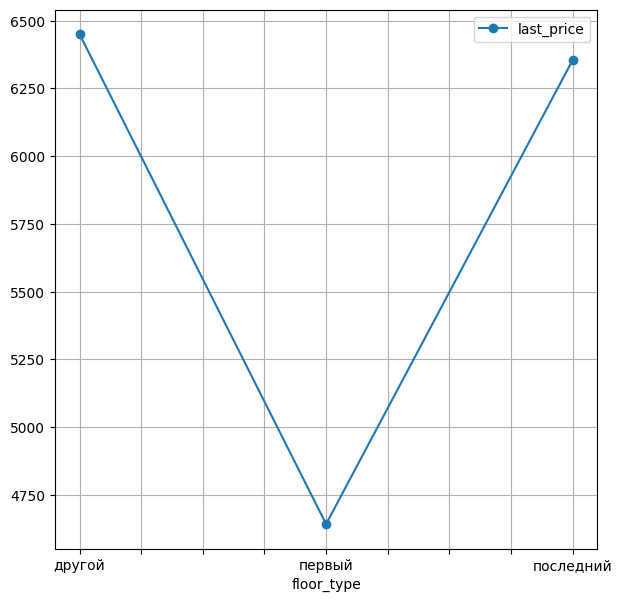

In [232]:
#зависимость цены квартиры от типа этажа, на котором расположена квартира (первый, последний, другой)
(
    data.pivot_table(index='floor_type', values='last_price')
    .plot(grid=True, style='o-', figsize=(7, 7))
); 

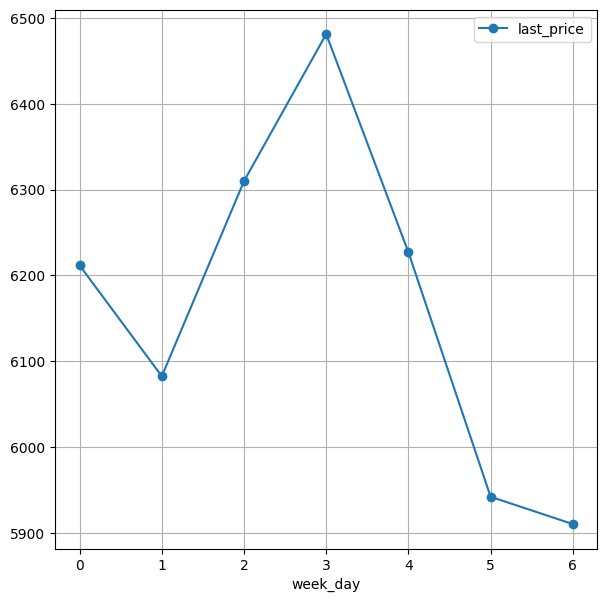

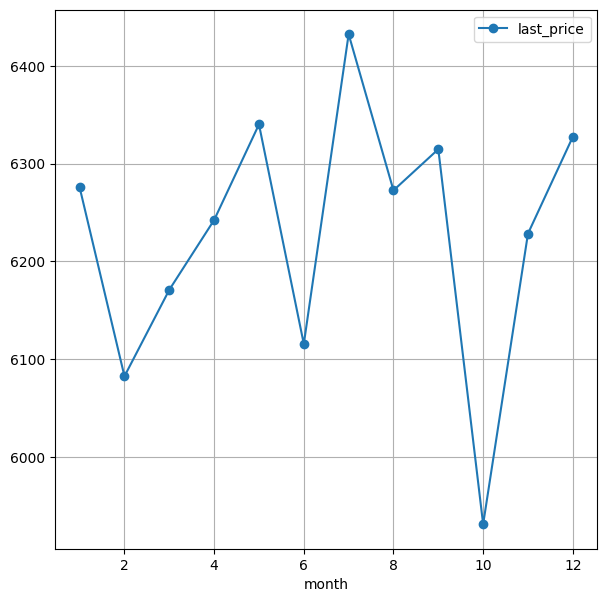

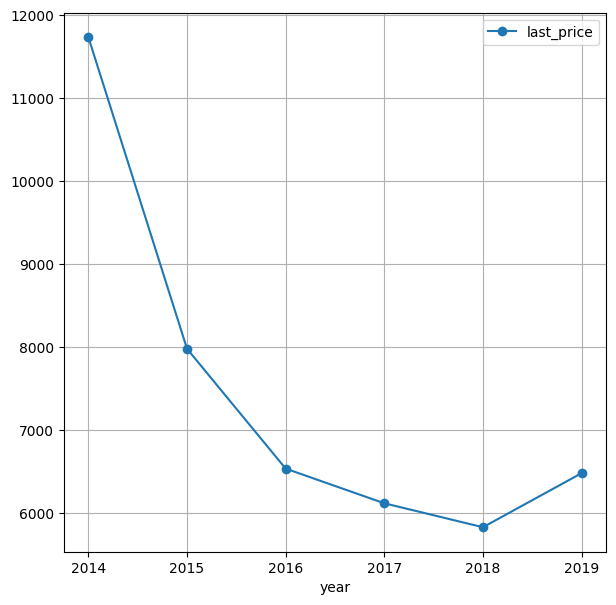

In [233]:
#зависимость цены квартиры от даты размещения (день недели, месяц, год)
(
    data.pivot_table(index='week_day', values='last_price')
    .plot(grid=True, style='o-', figsize=(7, 7))
); 

(
    data.pivot_table(index='month', values='last_price')
    .plot(grid=True, style='o-', figsize=(7, 7))
); 

(
    data.pivot_table(index='year', values='last_price')
    .plot(grid=True, style='o-', figsize=(7, 7))
); 

**Выводы:**
- чем больше площадь, тем выше стоимость;
- число комнат также оказывает влияяние на стоимость квартиры (больше комнат – выше цена);
- самые дорогие варианты квартир находятся в центре города, однако в центре наблюдаются также достаточно дешёвые варианты;
- квартиры на первом этаже стоят значительно дешевле, другие и последний этаж дороже;
- дороже всего квартиры, опубликованные в среду, а дешевле всего – в субботу;
- объявления, размещенные с февраля по май, имеют положительную динамику цены, в июне наблюдается резкий провал, в июле – снова рост и далее планомерный спад цены;
- с 2014 по 2018 годы наблюдает спад цен, однако, с 2018 гоад динамика цегн положительная.

Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. 


In [234]:
most_popular = data.pivot_table(index='locality_name', values=['last_price','total_area'] , aggfunc=['sum','count'])
most_popular.columns=['last_price_sum','total_area_sum','last_price_count','total_area_count']

In [235]:
most_popular = most_popular.sort_values(by=(['last_price_sum']), ascending=False)
most_popular['mean_sum'] = most_popular['last_price_sum']/most_popular['total_area_sum']
most_popular.head(15)

,last_price_sum,total_area_sum,last_price_count,total_area_count,mean_sum
locality_name,,,,,
санкт-петербург,1.160763e+08,962461.64,15272,15272,120.603604
пушкин,2.163448e+06,20691.00,355,355,104.559855
поселок городского типа мурино,1.992113e+06,23969.56,546,546,83.110117
поселок городского типа шушары,1.796806e+06,23560.96,437,437,76.262003
всеволожск,1.499499e+06,22146.13,395,395,67.709300
поселок городского типа парголово,1.460300e+06,16772.87,325,325,87.063243
колпино,1.294830e+06,17539.32,335,335,73.824427
деревня кудрово,1.260023e+06,13863.95,298,298,90.884865
сестрорецк,1.145957e+06,11410.06,181,181,100.433928


In [236]:
most_popular_top_10 = most_popular.query('last_price_sum > 1.067319e+06')
most_popular_top_10.head(10)

,last_price_sum,total_area_sum,last_price_count,total_area_count,mean_sum
locality_name,,,,,
санкт-петербург,1.160763e+08,962461.64,15272,15272,120.603604
пушкин,2.163448e+06,20691.00,355,355,104.559855
поселок городского типа мурино,1.992113e+06,23969.56,546,546,83.110117
поселок городского типа шушары,1.796806e+06,23560.96,437,437,76.262003
всеволожск,1.499499e+06,22146.13,395,395,67.709300
поселок городского типа парголово,1.460300e+06,16772.87,325,325,87.063243
колпино,1.294830e+06,17539.32,335,335,73.824427
деревня кудрово,1.260023e+06,13863.95,298,298,90.884865
сестрорецк,1.145957e+06,11410.06,181,181,100.433928


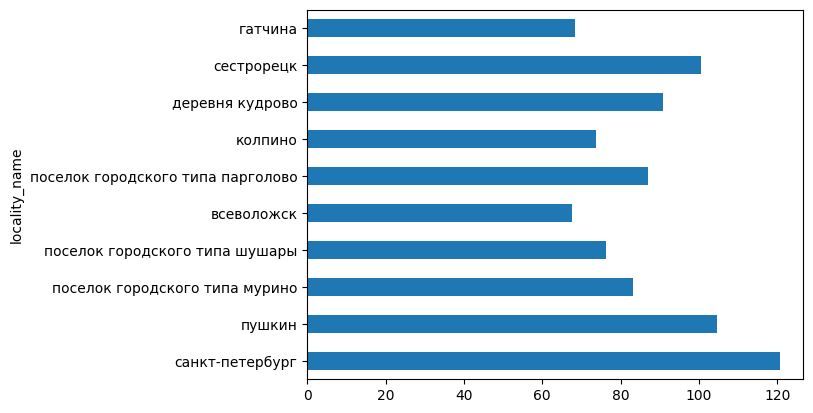

In [237]:
most_popular_top_10['mean_sum'].plot(kind='barh'); 

In [238]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23082 entries, 0 to 23081
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   total_images             23082 non-null  int64         
 1   last_price               23082 non-null  float64       
 2   total_area               23082 non-null  float64       
 3   first_day_exposition     23082 non-null  datetime64[ns]
 4   rooms                    23082 non-null  int64         
 5   ceiling_height           23082 non-null  float64       
 6   floors_total             23082 non-null  int64         
 7   living_area              23082 non-null  float64       
 8   floor                    23082 non-null  int64         
 9   is_apartment             23082 non-null  bool          
 10  studio                   23082 non-null  bool          
 11  open_plan                23082 non-null  bool          
 12  kitchen_area             20890 n

In [239]:
locations = data.pivot_table(index='locality_name', values='m_price', aggfunc=['count', 'mean']).reset_index()

In [240]:
locations

,locality_name,count,mean
,,m_price,m_price
0,бокситогорск,16,17.551592
1,волосово,36,40.183326
2,волхов,109,35.051479
3,всеволожск,395,68.739849
4,выборг,235,58.238143
...,...,...,...
316,сосновый бор,86,75.600874
317,сясьстрой,22,34.080811
318,тихвин,49,40.048573


In [241]:
locations.columns=['name','item','avg_price']
locations

,name,item,avg_price
0,бокситогорск,16,17.551592
1,волосово,36,40.183326
2,волхов,109,35.051479
3,всеволожск,395,68.739849
4,выборг,235,58.238143
...,...,...,...
316,сосновый бор,86,75.600874
317,сясьстрой,22,34.080811
318,тихвин,49,40.048573
319,тосно,102,58.945343


In [242]:
data.groupby('locality_name').agg({'balcony':'count', 'last_price':'median'}) \
    .sort_values(by = 'balcony', ascending = False) \
    .head(10)

,balcony,last_price
locality_name,,
санкт-петербург,15272,5500.0
поселок городского типа мурино,546,3400.0
поселок городского типа шушары,437,3950.0
всеволожск,395,3480.0
пушкин,355,5150.0
колпино,335,3600.0
поселок городского типа парголово,325,4100.0
гатчина,306,3095.0
деревня кудрово,298,3785.0


Вывод: в Санкт-Петербурге самая дорогая недвижимость, что ожидаемо.
А в Топ-10 наиболее дорогих городов входят ближайшие к Санкт-Петербургу.

In [243]:
spb_pivot = spb.pivot_table(index='city_centers_nearest_km', values='last_price', aggfunc='mean')
spb_pivot.head()

,last_price
city_centers_nearest_km,
0.0,26586.503273
1.0,20297.859335
2.0,16218.612517
3.0,10712.786122
4.0,11673.825737


In [244]:
#альтернативное решение в одну строку
spb = data.query('locality_name == "санкт-петербург"')
spb.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,m_price,week_day,month,year,floor_type,city_centers_nearest_km
0,20,13000.0,108.0,2019-03-07,3,2.70,16,51.0,8,True,...,482.0,2.0,755.0,0,120.370370,3,3,2019,другой,16.0
2,10,5196.0,56.0,2015-08-20,2,2.65,5,34.3,4,True,...,90.0,2.0,574.0,558,92.785714,3,8,2015,другой,14.0
3,0,64900.0,159.0,2015-07-24,3,2.65,14,30.0,9,True,...,84.0,3.0,234.0,424,408.176101,4,7,2015,другой,7.0
6,5,7915.0,71.6,2019-04-18,2,2.65,24,30.0,22,True,...,NaN,0.0,NaN,0,110.544693,3,4,2019,другой,12.0
8,18,5400.0,61.0,2017-02-26,3,2.50,9,43.6,7,True,...,NaN,0.0,NaN,289,88.524590,6,2,2017,другой,15.0


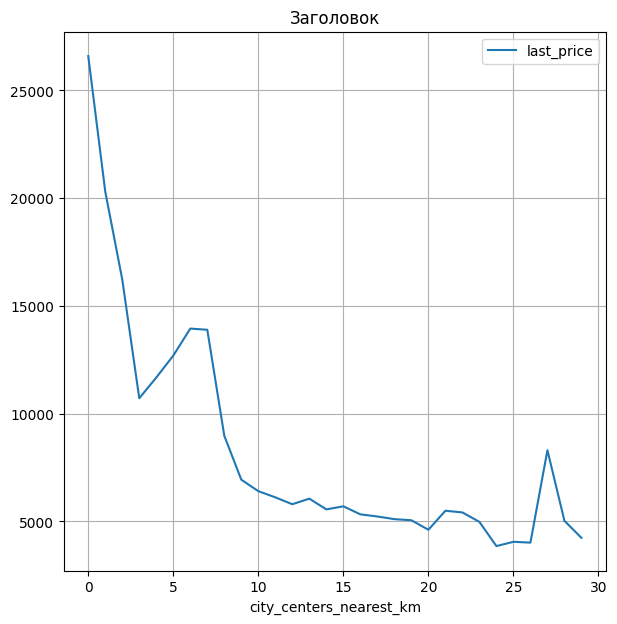

In [245]:
spb_pivot.plot(figsize=(7,7), grid=True, title = 'Заголовок'); 

Вывод: наиболее высокие цены у крватир в радиусе 2 км. Более низкие цены на недвижимость на расстоянии от 1 км до 7 км. 
С 7 км и дальше наблюдается спад цен с отдельными пиками - вероятно, в более престижных районах.

### Общий вывод

**Срок продажи квартиры**

Чаще всего квартины продаются за 5 месяцев или быстрее.
Наблюдается большое количетсво квартир, проданных всего за несколько дней после публикации.
Также есть квартиры, которые продавались несколько лет (от года до 3х).

**Факторы, влияющие на стоимость квартир**

На стоимость больше влияет площадь квартиры, но не число комнат - таким образом, могут быть более дорогие квартиры с меньшим числом комнат, но более просторные.
Квартиры на первом этаже значительно дешевле остальных. Также стоимость квартиры на последнем этаже немного ниже, чем на других (выше первого).

Дороже всего 1 квадратный метр в Санкт-Петербурге, а дешевле всего квадратный метр в Всеволожске.
В Санкт-Петербурге цена квартиры также влияет от ее удаленности от центра или райна города. В радиусе до 7 км от центра города наиболее дорогая недвижимсоть (за исключением некоторых районов в удаленности около 3км). После 7 км цены падают, однако, можно заметить пики - вероятно, в престижных районах. 
